In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')  # 윈도우의 경우
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')   # MacOS의 경우
else:
    rc('font', family='NanumGothic')   # 리눅스의 경우


# 데이터 파일 경로 설정
file_path = 'C:\\Users\\Admin\\Documents\\GitHub\\sg_2cha\\jh\\쇼핑몰이탈_최종.csv'  # 데이터 파일의 경로를 지정하세요.

# 데이터 불러오기
data = pd.read_csv(file_path)

# 데이터의 첫 몇 행을 출력하여 확인
print(data.head())


   고객 ID  이탈 여부  가입 기간         접속 기기  도시 등급  배송거리       결제 방식      성별  \
0      1      1      4  Mobile Phone      3     6  Debit Card  Female   
1      2      1      3         Phone      1     8         UPI    Male   
2      3      1      3         Phone      1    30  Debit Card    Male   
3      4      1      0         Phone      3    15  Debit Card    Male   
4      5      1      0         Phone      1    12          CC    Male   

   앱 사용 시간  기기 수             주문 카테고리  만족도   결혼 여부  주소 수  불만족 여부  주문 증가율  쿠폰 수  \
0        3     3  Laptop & Accessory    2  Single     9       1      11     1   
1        3     4              Mobile    3  Single     7       1      15     0   
2        2     4              Mobile    3  Single     6       1      14     0   
3        2     4  Laptop & Accessory    5  Single     8       0      23     0   
4        2     3              Mobile    5  Single     3       0      11     1   

   주문 횟수  경과일  캐시백 금액  
0      1    5     160  
1      1    0     121  
2 

In [12]:
#CityTier를 ordinal 범주형으로 변환
data['도시 등급'] = data['도시 등급'].astype('category')
print("\n도시 등급 데이터 타입 변환 후:")
print(data['도시 등급'].dtype)


도시 등급 데이터 타입 변환 후:
category


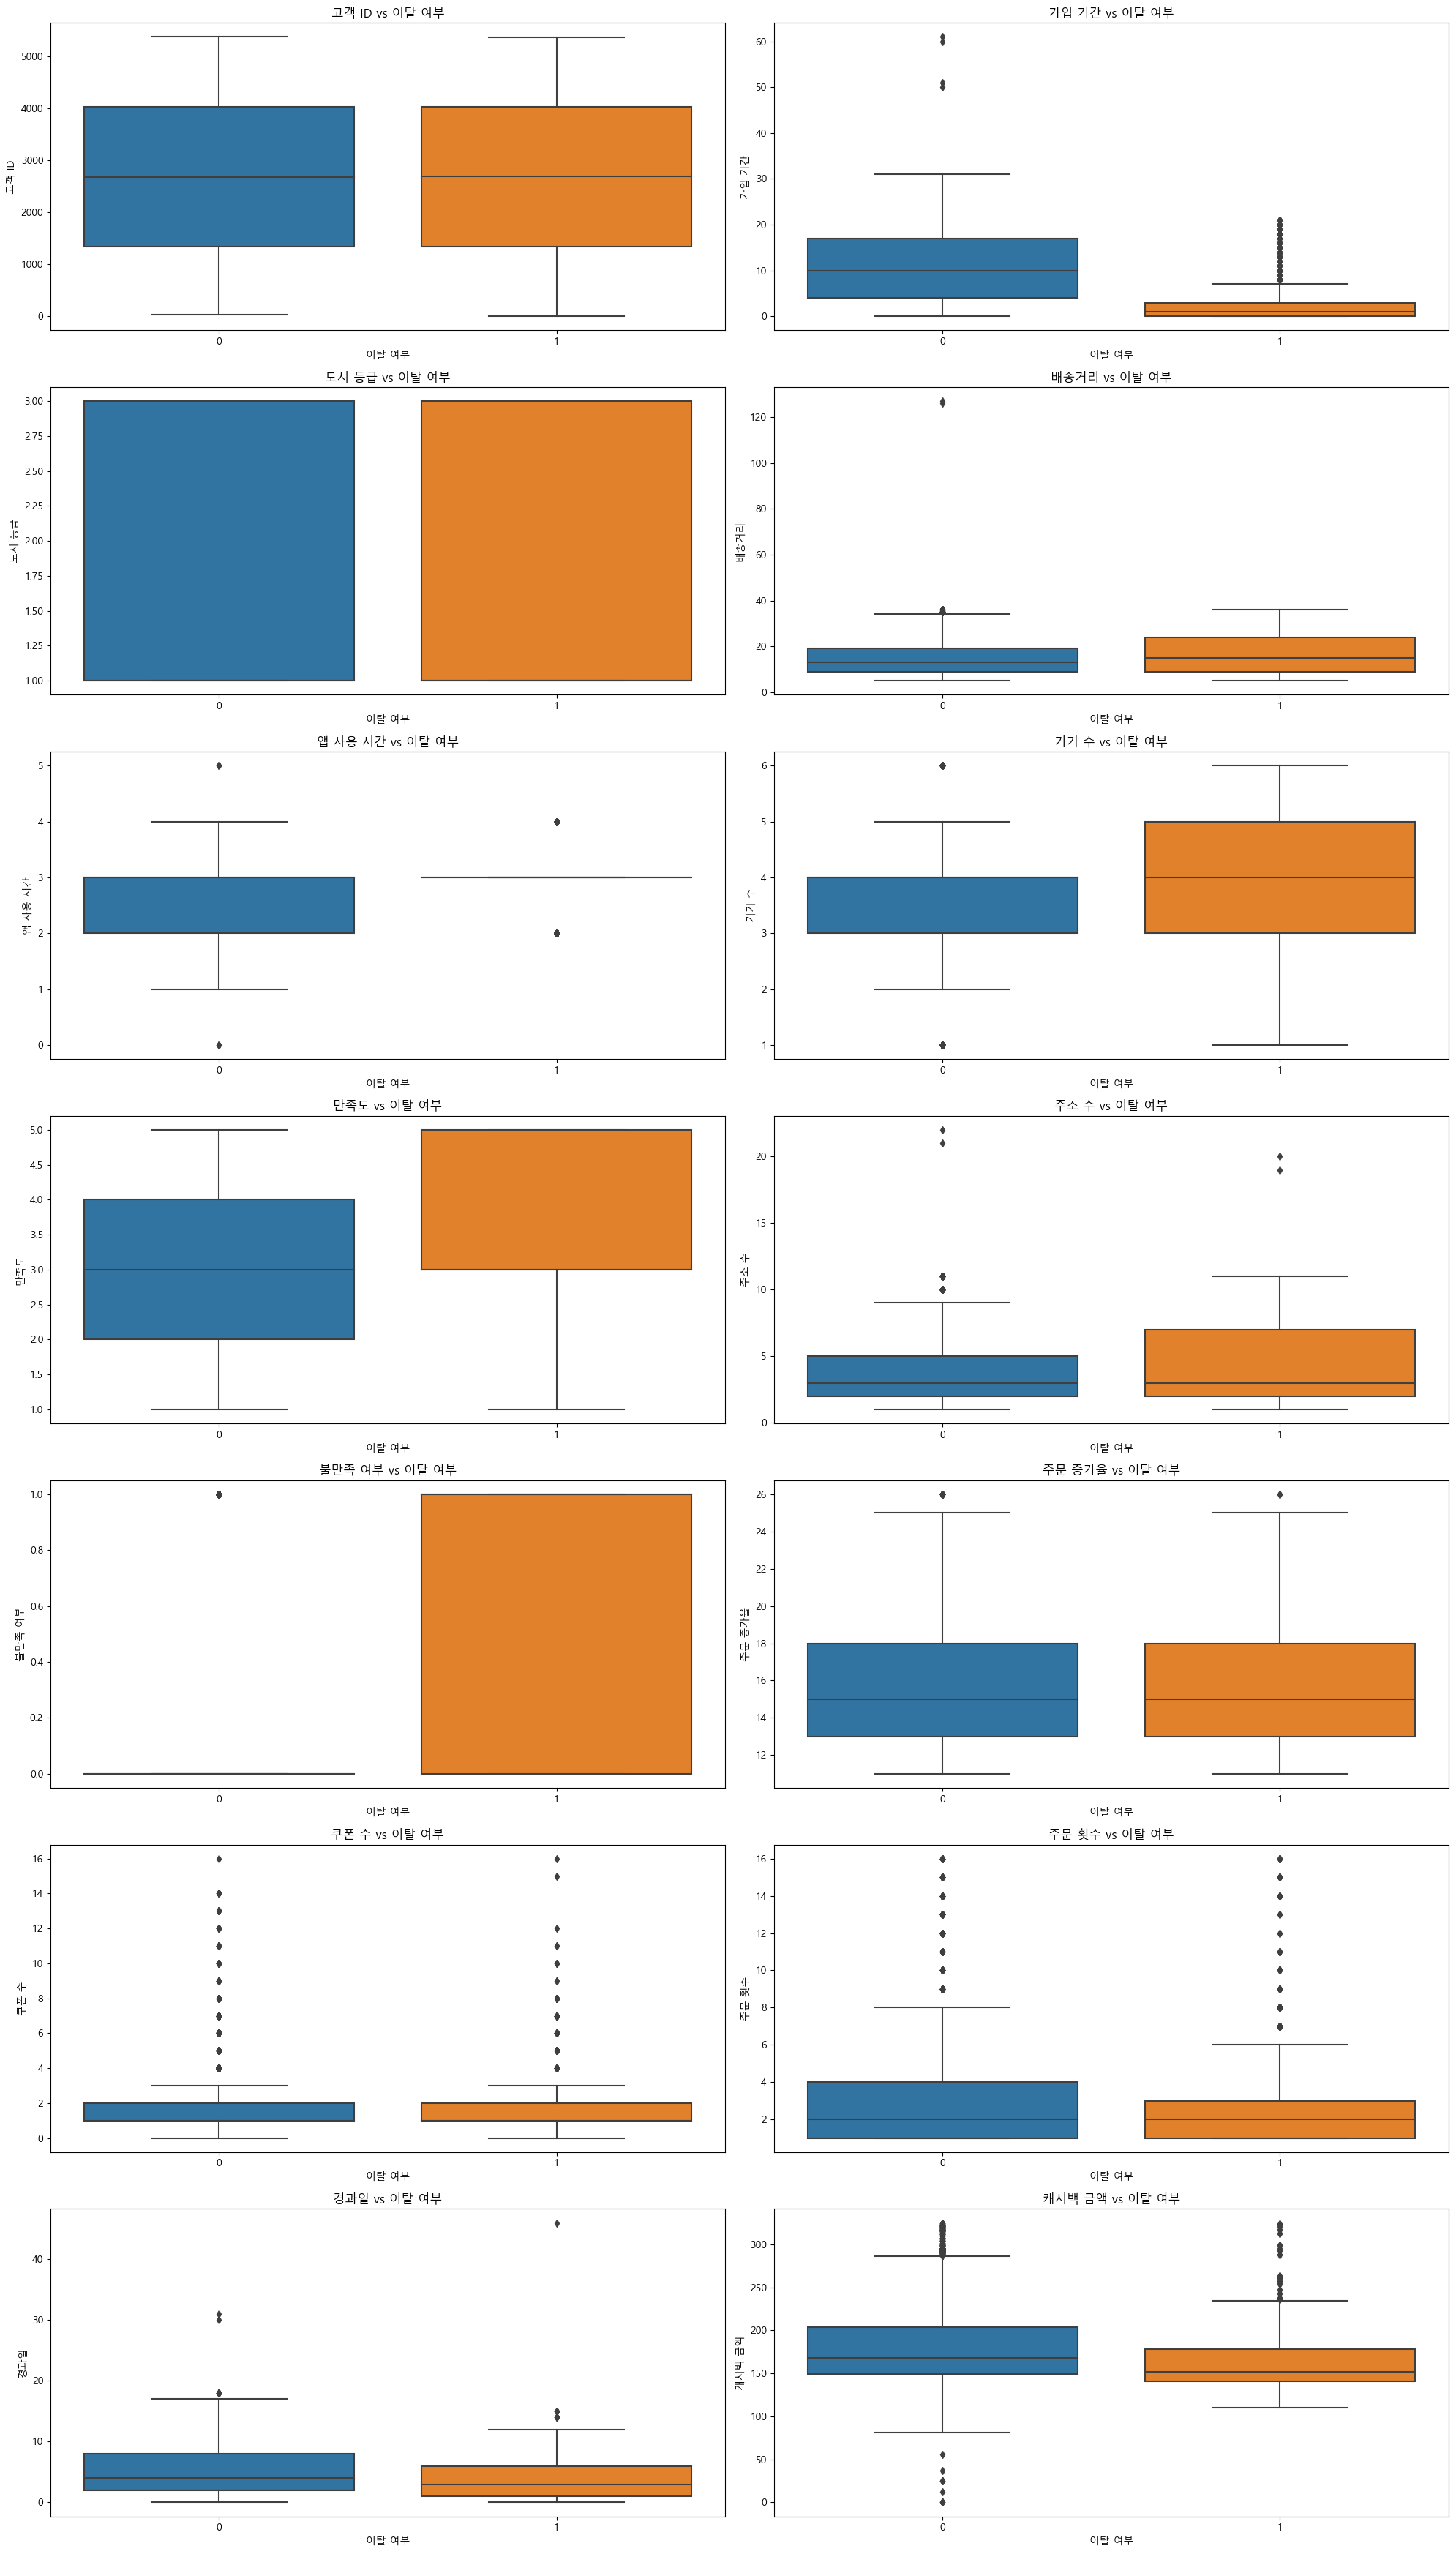

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연속형 변수 리스트
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(num_cols) - 1  # '이탈 여부' 제외
nrows = (num_plots // 2) + (num_plots % 2 > 0)  # 필요한 행 수 계산

fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(20, nrows * 5))
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 플롯 생성
i = 0
for col in num_cols:
    if col != '이탈 여부':
        if data[col].notnull().any():  # 빈 행이 없는 경우만 플롯 생성
            sns.boxplot(data=data, x='이탈 여부', y=col, ax=axes[i])
            axes[i].set_title(f'{col} vs 이탈 여부')
            i += 1

# 남은 서브플롯 비우기
for j in range(i, len(axes)):
    fig.delaxes(axes[j])  # 사용되지 않은 플롯 삭제

plt.tight_layout()
plt.show()


In [14]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(data[data['이탈 여부'] == 0]['가입 기간'],
                            data[data['이탈 여부'] == 1]['가입 기간'])
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 26.803350556284215, P-Value: 1.1886398509425906e-148


In [16]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['결제 방식'], data['이탈 여부'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, P-Value: {p}")


Chi2: 52.13430480263554, P-Value: 1.7523751159478666e-09


c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


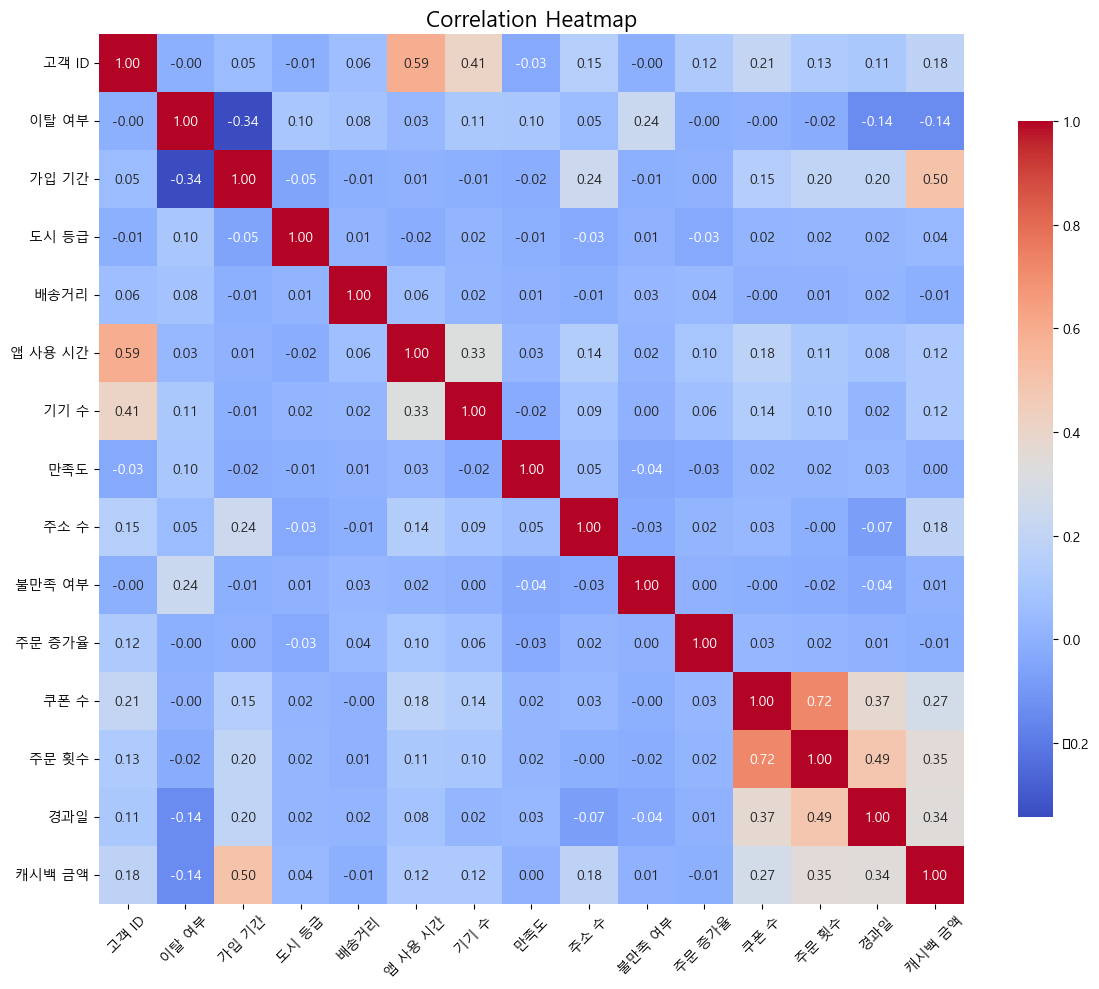

In [10]:

plt.figure(figsize=(12, 10))  # 크기 조정

# 숫자형 데이터만 선택하여 상관 행렬 계산
numeric_data = data.select_dtypes(include=['float64', 'int64'])
heatmap = sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", 
                       annot_kws={"size": 10},  # 글자 크기 조정
                       cbar_kws={"shrink": 0.8})  # 색상 바 크기 조정
plt.title('Correlation Heatmap', fontsize=16)  # 제목 크기 조정
plt.xticks(fontsize=10, rotation=45)  # x축 글자 크기 및 회전
plt.yticks(fontsize=10, rotation=0)  # y축 글자 크기 조정
plt.tight_layout()  # 레이아웃 조정
plt.show()


In [11]:

# 결측치 확인
print(data.isnull().sum())

# 기초 통계량 확인
print(data.describe())


고객 ID      0
이탈 여부      0
가입 기간      0
접속 기기      0
도시 등급      0
배송거리       0
결제 방식      0
성별         0
앱 사용 시간    0
기기 수       0
주문 카테고리    0
만족도        0
결혼 여부      0
주소 수       0
불만족 여부     0
주문 증가율     0
쿠폰 수       0
주문 횟수      0
경과일        0
캐시백 금액     0
dtype: int64
            고객 ID        이탈 여부        가입 기간        도시 등급         배송거리  \
count  5379.00000  5379.000000  5379.000000  5379.000000  5379.000000   
mean   2690.00000     0.160625    10.004648     1.670013    15.639896   
std    1552.92788     0.367219     8.529463     0.920741     8.531475   
min       1.00000     0.000000     0.000000     1.000000     5.000000   
25%    1345.50000     0.000000     3.000000     1.000000     9.000000   
50%    2690.00000     0.000000     8.000000     1.000000    14.000000   
75%    4034.50000     0.000000    16.000000     3.000000    20.000000   
max    5379.00000     1.000000    61.000000     3.000000   127.000000   

           앱 사용 시간         기기 수          만족도         주소 수       불만족 여

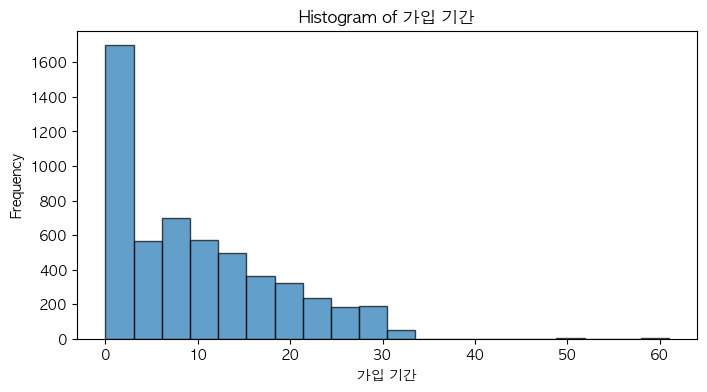

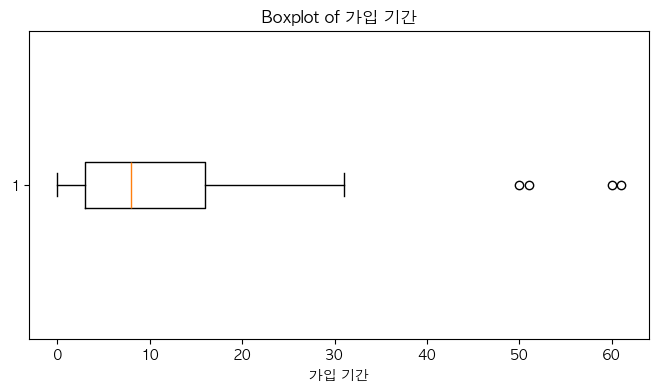

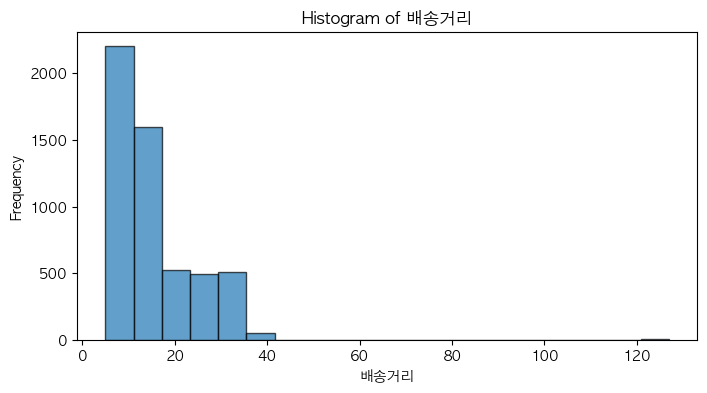

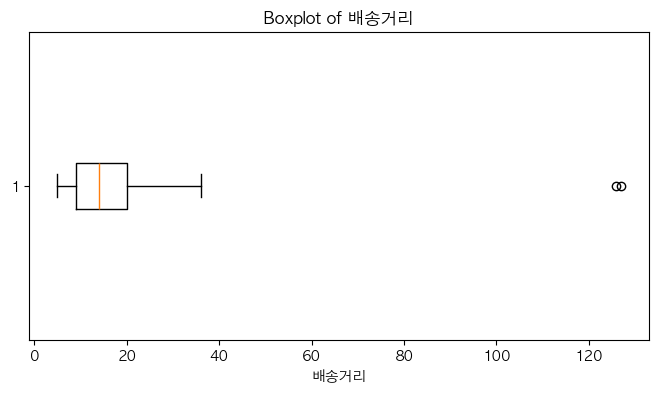

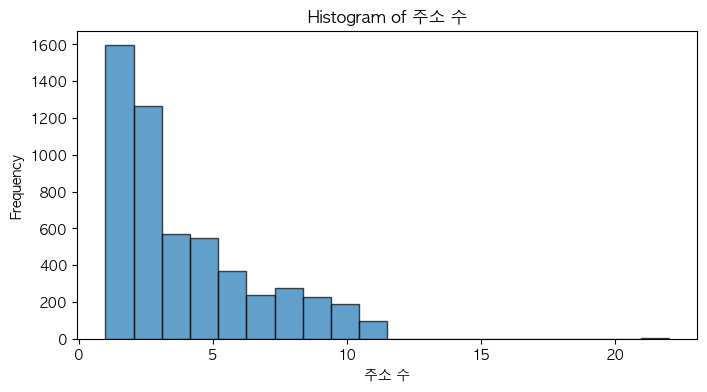

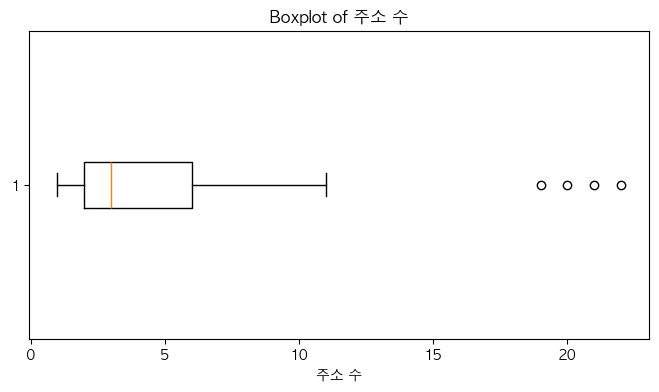

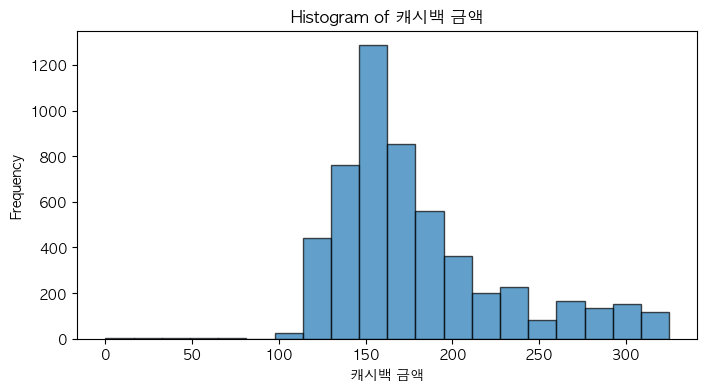

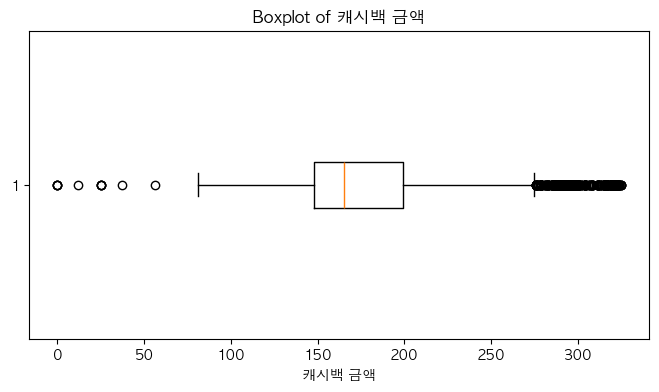

In [51]:

# 주요 변수 분포 시각화
key_variables = ['가입 기간', '배송거리', '주소 수', '캐시백 금액']

for col in key_variables:
    plt.figure(figsize=(8, 4))
    plt.hist(data[col], bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_11261/139897920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='이탈 여부', y=var, data=data, palette='Set2')


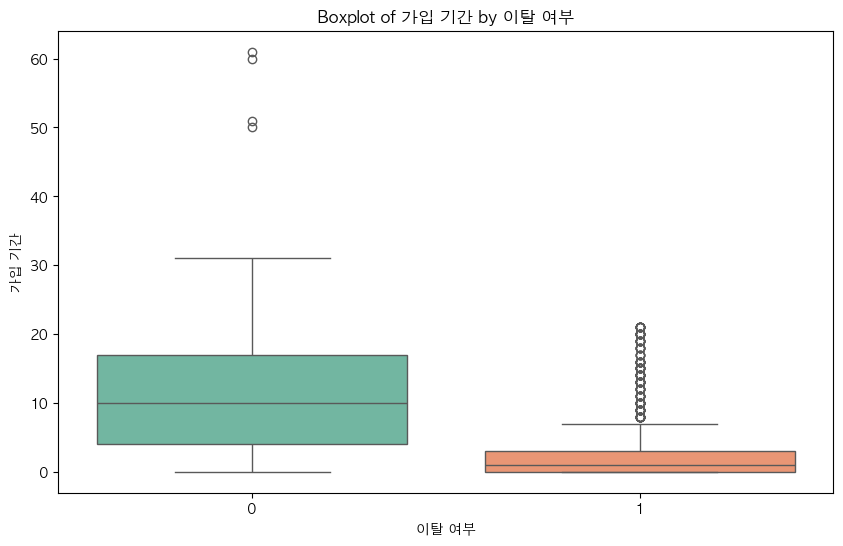

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_11261/139897920.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='이탈 여부', y=var, data=data, palette='Set3', inner='quartile')


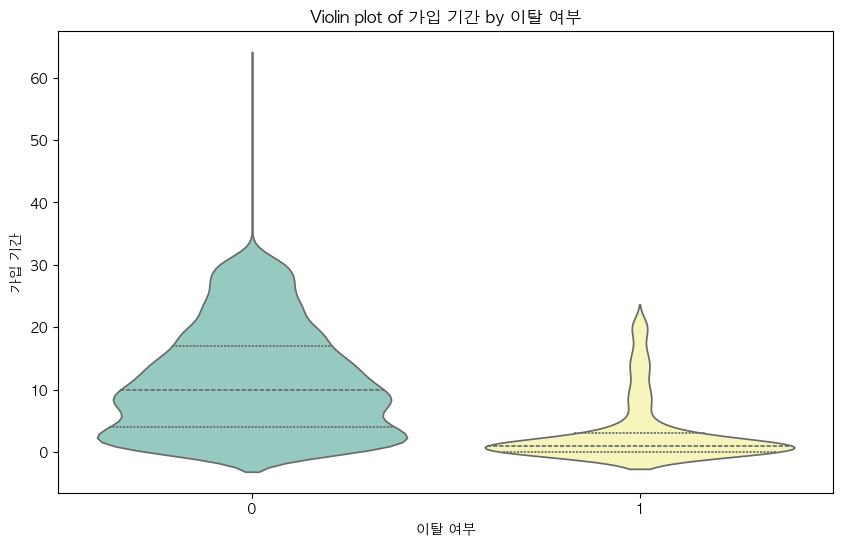

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_11261/139897920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='이탈 여부', y=var, data=data, palette='Set2')


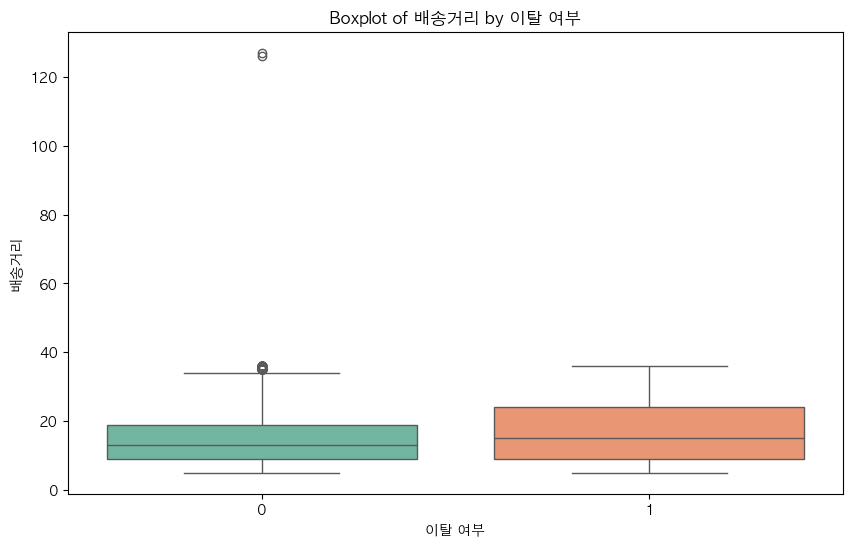

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_11261/139897920.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='이탈 여부', y=var, data=data, palette='Set3', inner='quartile')


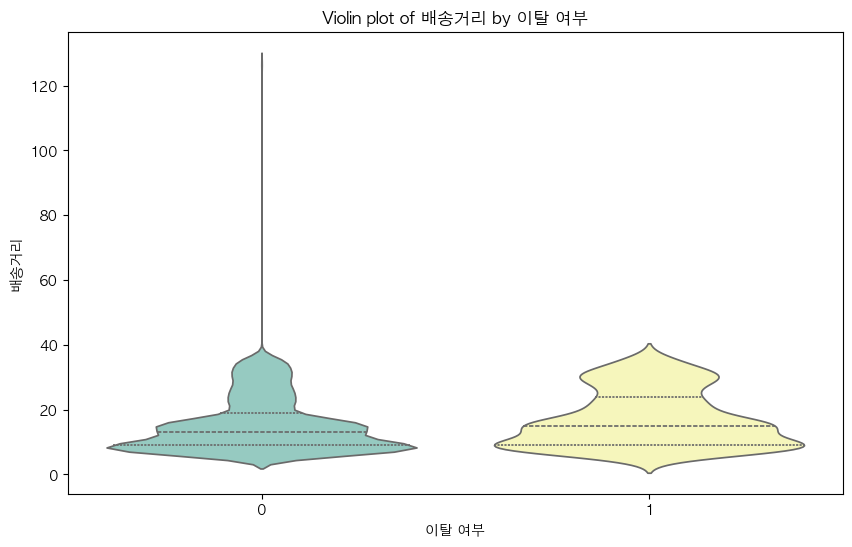

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_11261/139897920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='이탈 여부', y=var, data=data, palette='Set2')


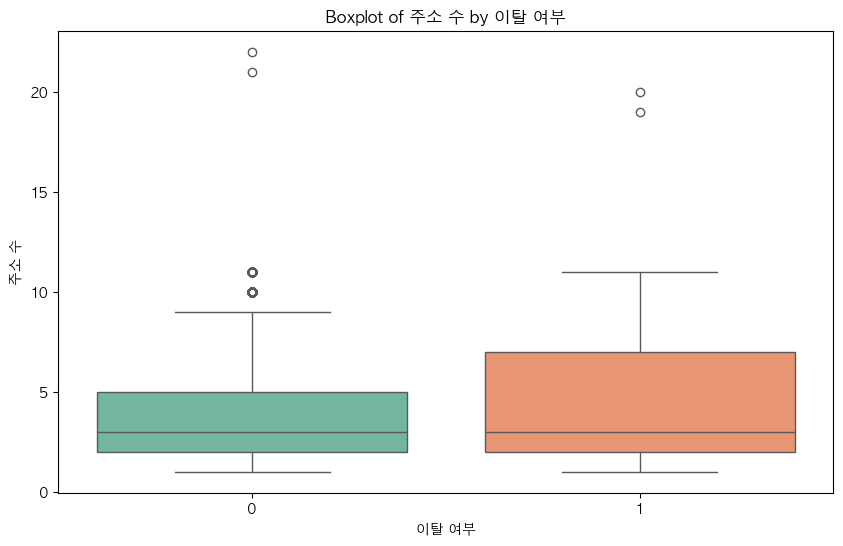

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_11261/139897920.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='이탈 여부', y=var, data=data, palette='Set3', inner='quartile')


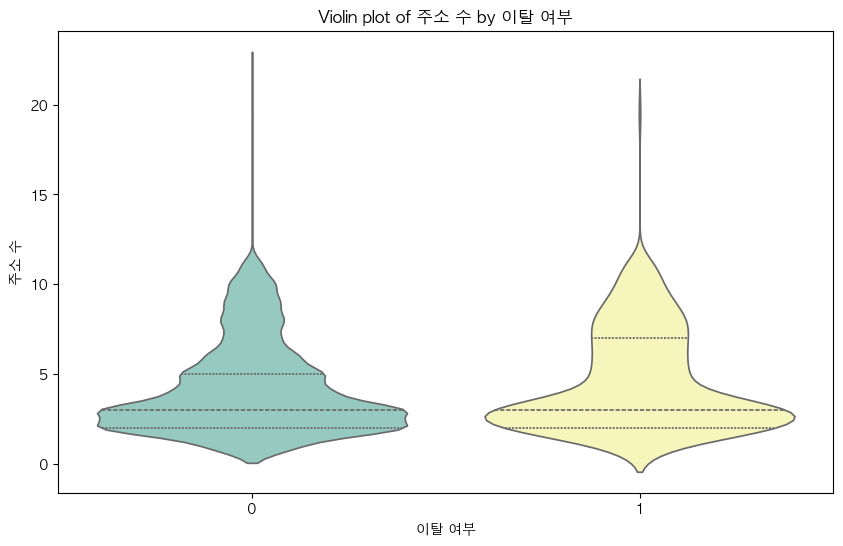

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_11261/139897920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='이탈 여부', y=var, data=data, palette='Set2')


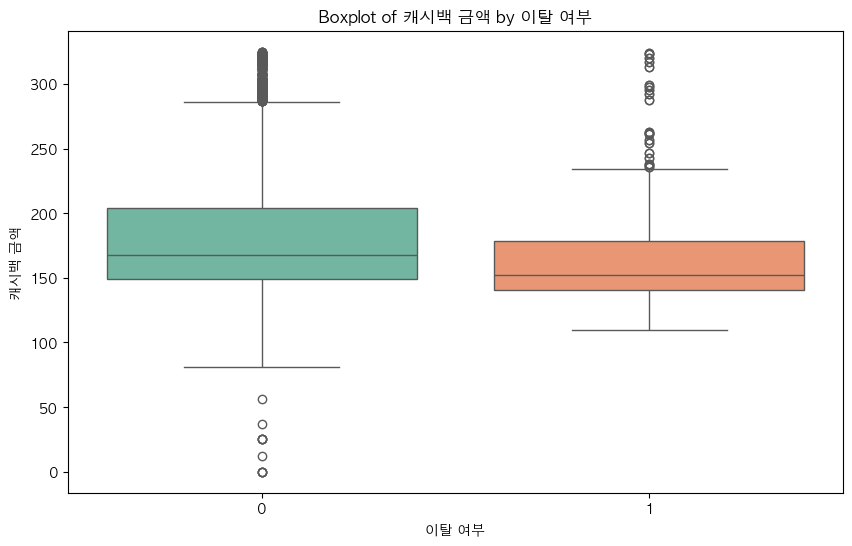

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_11261/139897920.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='이탈 여부', y=var, data=data, palette='Set3', inner='quartile')


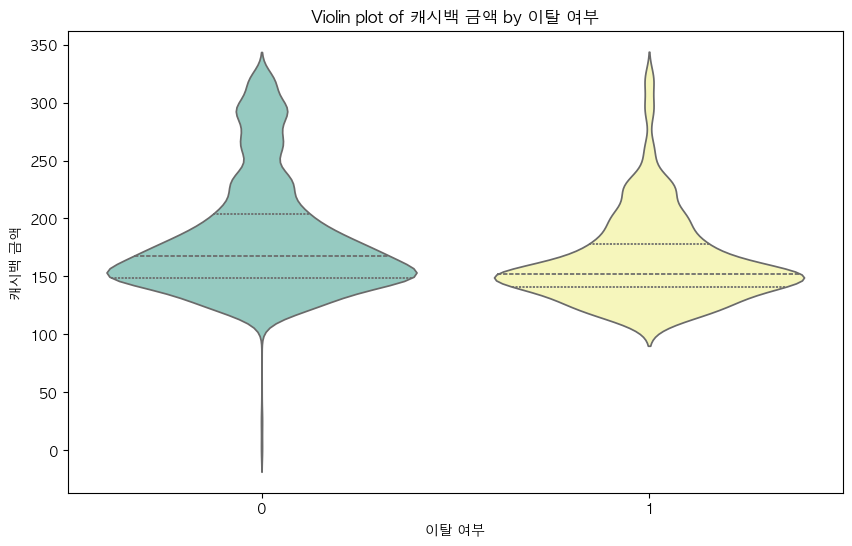

In [52]:

# 주요 변수와 이탈 여부 간의 박스플롯 및 바이올린 플롯
for var in key_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='이탈 여부', y=var, data=data, palette='Set2')
    plt.title(f'Boxplot of {var} by 이탈 여부')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.violinplot(x='이탈 여부', y=var, data=data, palette='Set3', inner='quartile')
    plt.title(f'Violin plot of {var} by 이탈 여부')
    plt.show()


In [53]:

# t-test를 이용하여 이탈 여부에 따른 주요 변수들의 차이 검정
results = {}
for var in key_variables:
    group_0 = data[data['이탈 여부'] == 0][var]  # 유지 고객
    group_1 = data[data['이탈 여부'] == 1][var]  # 이탈 고객
    t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)  # Welch's t-test
    results[var] = {"t_stat": t_stat, "p_value": p_value}

print(results)


{'가입 기간': {'t_stat': np.float64(36.887415497761545), 'p_value': np.float64(1.8040454654722562e-224)}, '배송거리': {'t_stat': np.float64(-5.570000448449957), 'p_value': np.float64(3.139837473191467e-08)}, '주소 수': {'t_stat': np.float64(-3.238721086062366), 'p_value': np.float64(0.0012348701329325151)}, '캐시백 금액': {'t_stat': np.float64(12.49586744376871), 'p_value': np.float64(3.8320360008982366e-34)}}


1. 지속적인 분석 및 모니터링 체계 구축
1.1 주요 변수 모니터링
가입 기간, 배송거리, 캐시백 금액 등의 주요 변수에 대한 분포와 변화 추이를 정기적으로 분석합니다.
이탈률이 급격히 증가하거나 감소하는 시점을 탐지하기 위한 모니터링 대시보드 구축.
방법:
가입 기간, 배송거리, 캐시백 금액의 분포를 주기적으로 시각화.
KPI(Key Performance Indicators) 설정(예: 이탈률, 캐시백 평균).
시간 흐름에 따른 주요 지표의 변화 분석.
1.2 자동화된 알림 시스템
특정 변수의 이상치가 증가하거나 급격한 변동이 발생하면 관리자에게 알림을 제공.
도구: Python + Task Scheduler (크론탭) 또는 클라우드 모니터링 솔루션(AWS, GCP).
2. 새로운 이탈 요인 탐지
2.1 데이터 확장 및 수집
고객의 행동 데이터(예: 클릭 수, 장바구니에 담긴 상품 수, 페이지 체류 시간)와 같은 추가 데이터를 수집하여 분석.
다양한 변수와 이탈 여부 간 관계를 머신러닝 기법으로 탐지.
2.2 머신러닝 기반 이탈 예측 모델
고객 이탈을 예측하기 위해 분류 모델 구축(로지스틱 회귀, Random Forest, XGBoost 등).
모델링 절차:
주요 변수와 이탈 여부 데이터를 활용하여 학습 데이터 생성.
모델 학습 및 평가(정확도, AUC-ROC 등 메트릭 사용).
새로운 변수 추가 시 모델 재학습 및 성능 비교.
피처 중요도 분석:
변수 중요도(Feature Importance)를 도출하여 새로운 이탈 요인 탐지.
3. 결과 반영 및 전략 수정
3.1 요약 리포트 작성
정기적인 보고서를 통해 주요 변수와 이탈률 간 관계 요약.
새로운 요인이 확인되면 이를 반영한 보고서 생성.
3.2 전략 수정 및 테스트
새로운 요인에 대한 고객 유지 전략 제안 및 실험(A/B 테스트).
예: "배송 시간"이 이탈 요인으로 확인되었다면, 배송 시간을 줄이기 위한 실험 설계.
4. 실시간 대시보드 구축
도구 추천:
Python 기반의 Dash/Plotly 또는 Tableau를 활용하여 대시보드 개발.
대시보드 구성 요소:
주요 변수의 실시간 분포 및 이탈률 시각화.
시간에 따른 변화 추이(Line Chart).
주요 변수 간 상관관계 및 이탈률 상관 분석 결과.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 데이터 로드
data = pd.read_csv('customer_data.csv')

# 주요 변수 모니터링
def monitor_kpi(data):
    kpis = ['가입 기간', '배송거리', '캐시백 금액']
    for kpi in kpis:
        plt.figure(figsize=(10, 5))
        plt.hist(data[kpi], bins=20, edgecolor='black', alpha=0.7)
        plt.title(f"{kpi} Distribution")
        plt.show()

# 새로운 변수 및 이탈 예측 모델 학습
def train_model(data):
    X = data[['가입 기간', '배송거리', '캐시백 금액']]  # 주요 변수
    y = data['이탈 여부']
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)
    return model, model.feature_importances_

# 실행
monitor_kpi(data)
model, feature_importances = train_model(data)
print("Feature Importances:", feature_importances)


FileNotFoundError: [Errno 2] No such file or directory: 'customer_data.csv'

## ------------------------------ 구분선

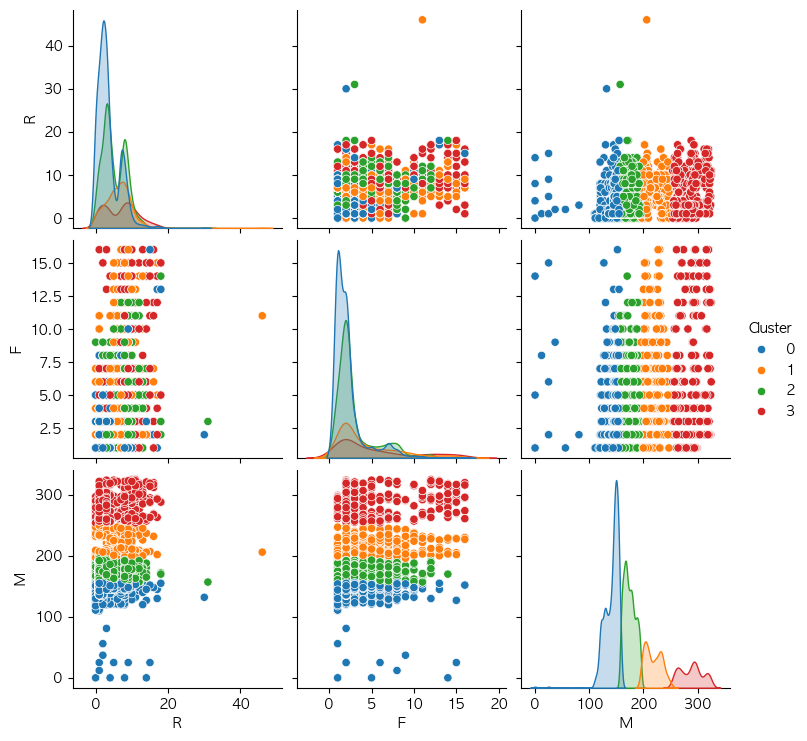

,R,F,M,Cluster
고객 ID,,,,
1,5,1,160,2
2,0,1,121,0
3,3,1,120,0
4,3,1,134,0
5,3,1,130,0


In [97]:

# RFM 분석
import pandas as pd
from datetime import datetime

# 데이터 로드
data = pd.read_csv('쇼핑몰고객행동.csv')

# RFM 계산
snapshot_date = datetime(2025, 1, 1)
data['Recency'] = (snapshot_date - pd.to_datetime(data['구매일'])).dt.days
rfm = data.groupby('고객 ID').agg({
    'Recency': 'min',
    '주문 횟수': 'sum',
    '캐시백 금액': 'sum'
}).rename(columns={'Recency': 'R', '주문 횟수': 'F', '캐시백 금액': 'M'})




# 클러스터링
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm[['R', 'F', 'M']])

# 클러스터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(rfm, vars=['R', 'F', 'M'], hue='Cluster', palette='tab10')
plt.show()

# 데이터 검증
df2 = rfm
import pandas as pd

# df2의 모든 내용을 출력
# pd.set_option('display.max_rows', None)  # 모든 행을 표시하도록 설정
df2.head()


In [58]:
from datetime import datetime

# RFM 분석을 위해 필요한 데이터 전처리
snapshot_date = datetime(2025, 1, 1)  # 기준 날짜 설정
data['구매일'] = pd.to_datetime(data['구매일'])  # 구매일 데이터 형식 변환
data['Recency'] = (snapshot_date - data['구매일']).dt.days  # Recency 계산

# RFM 데이터프레임 생성
rfm = data.groupby('고객 ID').agg({
    'Recency': 'min',           # 가장 최근 구매일
    '주문 횟수': 'sum',         # 주문 빈도
    '캐시백 금액': 'sum'        # 금액 합계
}).rename(columns={'Recency': 'R', '주문 횟수': 'F', '캐시백 금액': 'M'})

# 데이터 검증
rfm.head()


,R,F,M
고객 ID,,,
1,5,1,160
2,0,1,121
3,3,1,120
4,3,1,134
5,3,1,130


In [79]:
from sklearn.cluster import KMeans

# 클러스터링을 위한 데이터 준비
rfm_scaled = rfm.copy()

# KMeans 클러스터링 수행 (클러스터 수: 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled[['R', 'F', 'M']])

# 클러스터별 통계 요약
cluster_summary = rfm_scaled.groupby('Cluster').agg({
    'R': ['mean', 'median'],
    'F': ['mean', 'median'],
    'M': ['mean', 'median']
})

# 결과 표시
print("클러스터별 통계 요약:")
print(cluster_summary)

클러스터별 통계 요약:
                R                F                  M       
             mean median      mean median        mean median
Cluster                                                     
0        3.407587    3.0  2.227172    2.0  140.951037  146.0
1        6.190418    6.0  4.307125    2.0  217.872236  217.0
2        5.051601    4.0  2.980427    2.0  174.026097  173.0
3        6.880719    7.0  5.261438    3.0  287.866013  291.0


클러스터 0:

Recency (R): 평균값은 약 3.4일, 중앙값은 3일로, 고객이 최근에 구매한 경우가 많습니다.
Frequency (F): 평균값은 약 2.2회, 중앙값은 2회로, 주문 횟수가 낮은 편입니다.
Monetary (M): 평균값은 약 141, 중앙값은 146으로, 캐시백 금액도 비교적 낮은 고객 그룹입니다.
특징: 최근에 구매했지만, 구매 빈도와 금액이 낮은 고객 그룹.
클러스터 1:

Recency (R): 평균값은 약 6.2일, 중앙값은 6일로, 비교적 최근에 구매한 고객 그룹입니다.
Frequency (F): 평균값은 약 4.3회, 중앙값은 2회로, 구매 빈도가 높은 고객 그룹입니다.
Monetary (M): 평균값은 약 218, 중앙값은 217로, 캐시백 금액도 상대적으로 높습니다.
특징: 구매 빈도와 캐시백 금액이 높아 중요한 고객 그룹으로 간주할 수 있습니다.
클러스터 2:

Recency (R): 평균값은 약 5.1일, 중앙값은 4일로, 최근 구매 활동이 활발합니다.
Frequency (F): 평균값은 약 3.0회, 중앙값은 2회로, 적당한 구매 빈도를 보입니다.
Monetary (M): 평균값은 약 174, 중앙값은 173으로, 캐시백 금액도 중간 수준입니다.
특징: 중간 구매 빈도와 금액을 보이는 일반 고객 그룹.
클러스터 3:

Recency (R): 평균값은 약 6.9일, 중앙값은 7일로, 구매가 가장 오래된 고객 그룹입니다.
Frequency (F): 평균값은 약 5.3회, 중앙값은 3회로, 구매 빈도가 가장 높습니다.
Monetary (M): 평균값은 약 288, 중앙값은 291로, 캐시백 금액도 가장 높습니다.
특징: 구매 빈도와 금액이 가장 높은 VIP 고객 그룹으로 볼 수 있습니다.
분석 요약:
클러스터 0: 신규 고객 또는 비활성 고객
클러스터 1: 충성도가 높은 고객
클러스터 2: 일반적인 고객
클러스터 3: 고가치 VIP 고객

클러스터 3 고객의 기술 통계:
                R           F           M  Cluster
count  612.000000  612.000000  612.000000    612.0
mean     6.880719    5.261438  287.866013      3.0
std      4.505732    4.483863   20.432437      0.0
min      0.000000    1.000000  253.000000      3.0
25%      3.000000    2.000000  268.750000      3.0
50%      7.000000    3.000000  291.000000      3.0
75%     10.000000    7.000000  301.000000      3.0
max     18.000000   16.000000  325.000000      3.0
상관관계 행렬:
          R         F         M
R  1.000000  0.417211  0.093301
F  0.417211  1.000000  0.092527
M  0.093301  0.092527  1.000000


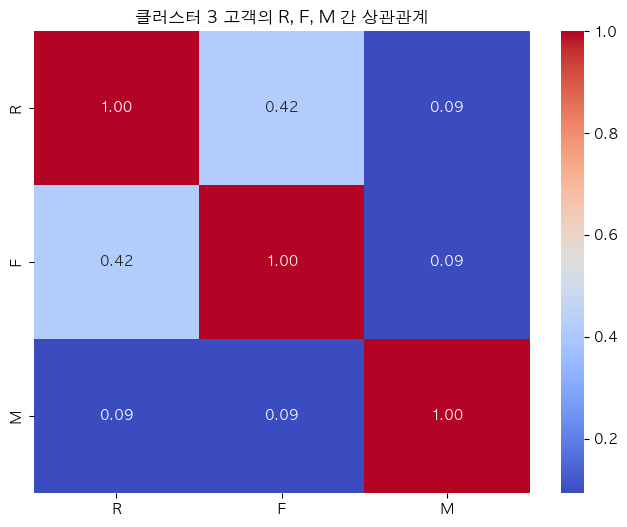

클러스터 3 고객의 R, F, M 변동성:
R     4.505732
F     4.483863
M    20.432437
dtype: float64


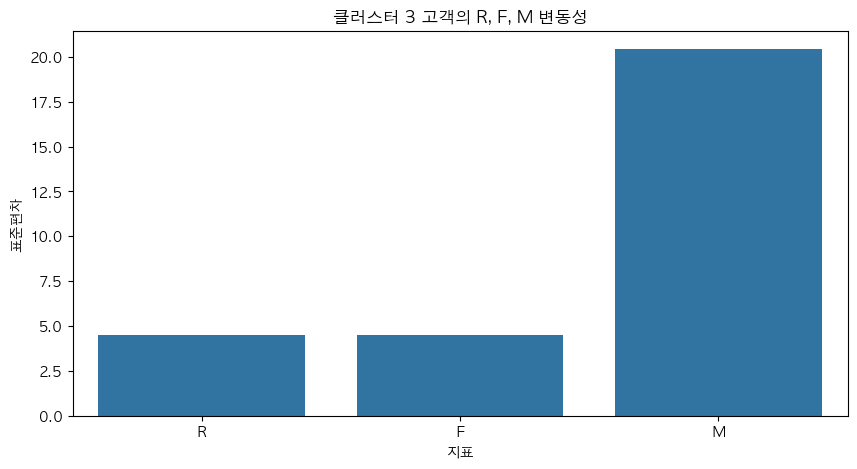

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 클러스터 3 고객 데이터 필터링
cluster_3_data = rfm[rfm['Cluster'] == 3]

# 기술 통계
print("클러스터 3 고객의 기술 통계:")
print(cluster_3_data.describe())

# 상관관계 분석
correlation_matrix = cluster_3_data[['R', 'F', 'M']].corr()
print("상관관계 행렬:")
print(correlation_matrix)

# 상관관계 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('클러스터 3 고객의 R, F, M 간 상관관계')
plt.show()

# 변동성 분석
cluster_3_variability = cluster_3_data[['R', 'F', 'M']].std()
print("클러스터 3 고객의 R, F, M 변동성:")
print(cluster_3_variability)

# 변동성 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=cluster_3_variability.index, y=cluster_3_variability.values)
plt.title('클러스터 3 고객의 R, F, M 변동성')
plt.ylabel('표준편차')
plt.xlabel('지표')
plt.show()

# 인사이트 맞춤형 서비스 강화
VIP 고객의 구매 주기(6.9일)에 맞춘 개인화된 프로모션 제공
높은 구매 빈도를 유지할 수 있는 리워드 프로그램 개발
고객 충성도 프로그램
안정적인 구매 금액을 보상하는 VIP 전용 혜택 제공
프리미엄 고객 서비스 확대
리스크 관리
구매 주기 모니터링을 통한 이탈 징후 조기 감지
VIP 고객 불만사항 즉시 대응 시스템 구축

In [74]:
# 클러스터별 세부 마케팅 전략 정의
marketing_strategies = {
    '클러스터 0': {  # 신규/비활성 고객
        '타겟팅': {
            '주요_특성': '최근 구매했으나 구매빈도와 금액이 낮은 고객',
            '목표': '구매빈도 증가 및 구매금액 상승'
        },
        '액션_플랜': [
            {
                '전략': '웰컴 패키지 프로그램',
                '내용': '첫 구매 후 7일 이내 재구매시 추가 할인',
                '기대효과': '구매빈도 증가'
            },
            {
                '전략': '상품 추천 시스템',
                '내용': '첫 구매 상품 연관 상품 추천',
                '기대효과': '구매금액 증가'
            }
        ]
    },
    '클러스터 1': {  # 충성 고객
        '타겟팅': {
            '주요_특성': '구매빈도와 금액이 높은 충성 고객',
            '목표': '구매 패턴 유지 및 VIP 등급 상승'
        },
        '액션_플랜': [
            {
                '전략': '멤버십 혜택 강화',
                '내용': '누적 구매액에 따른 추가 혜택',
                '기대효과': '구매 충성도 강화'
            },
            {
                '전략': '개인화 쇼핑 경험',
                '내용': '구매 이력 기반 맞춤 상품 추천',
                '기대효과': '고객 만족도 향상'
            }
        ]
    },
    '클러스터 2': {  # 일반 고객
        '타겟팅': {
            '주요_특성': '중간 수준의 구매빈도와 금액',
            '목표': '상위 클러스터로 이동 유도'
        },
        '액션_플랜': [
            {
                '전략': '구매 업그레이드 프로그램',
                '내용': '구매액 증가시 즉시 사용 가능한 할인 쿠폰',
                '기대효과': '구매금액 증가'
            },
            {
                '전략': '시즌별 프로모션',
                '내용': '시즌별 한정 특가 상품 제공',
                '기대효과': '구매빈도 증가'
            }
        ]
    },
    '클러스터 3': {  # VIP 고객
        '타겟팅': {
            '주요_특성': '최고 수준의 구매빈도와 금액',
            '목표': 'VIP 고객 유지 및 관리'
        },
        '액션_플랜': [
            {
                '전략': 'VIP 전용 서비스',
                '내용': '전용 고객센터, 프리미엄 배송',
                '기대효과': '고객 만족도 극대화'
            },
            {
                '전략': '프리미엄 이벤트',
                '내용': 'VIP 전용 프리뷰, 특별 할인',
                '기대효과': 'VIP 고객 충성도 강화'
            }
        ]
    }
}

# 실행 모니터링 지표 정의
monitoring_metrics = {
    '고객 행동 지표': [
        '클러스터별 평균 구매빈도 변화',
        '클러스터별 평균 구매금액 변화',
        '클러스터 간 이동률'
    ],
    '마케팅 성과 지표': [
        '프로모션별 전환율',
        '고객 생애 가치(CLV) 변화',
        '클러스터별 고객 만족도'
    ],
    '리텐션 지표': [
        '클러스터별 이탈률',
        '재구매율',
        'VIP 유지율'
    ]
}

# 실행 일정 계획
implementation_schedule = {
    '1단계: 기반 구축 (1-2개월)': [
        '클러스터별 커뮤니케이션 채널 구축',
        '모니터링 시스템 설정',
        '초기 프로모션 기획'
    ],
    '2단계: 시범 운영 (3-4개월)': [
        '클러스터별 핵심 전략 시범 적용',
        '고객 반응 모니터링',
        '전략 효과성 분석'
    ],
    '3단계: 전면 실행 (5-6개월)': [
        '전체 전략 구현',
        '성과 측정 및 보고',
        '전략 최적화'
    ]
}

# 예상 성과 지표
expected_outcomes = {
    '클러스터 0': {
        '구매빈도 증가율': '30%',
        '평균 구매금액 증가': '25%',
        '상위 클러스터 이동률': '15%'
    },
    '클러스터 1': {
        '고객 유지율': '85%',
        'VIP 전환율': '20%',
        '구매금액 증가': '30%'
    },
    '클러스터 2': {
        '상위 클러스터 이동률': '25%',
        '구매빈도 증가': '35%',
        '고객 만족도 개선': '40%'
    },
    '클러스터 3': {
        'VIP 유지율': '90%',
        '평균 구매금액 증가': '20%',
        '고객 만족도': '95%'
    }
}

<Figure size 1500x600 with 0 Axes>

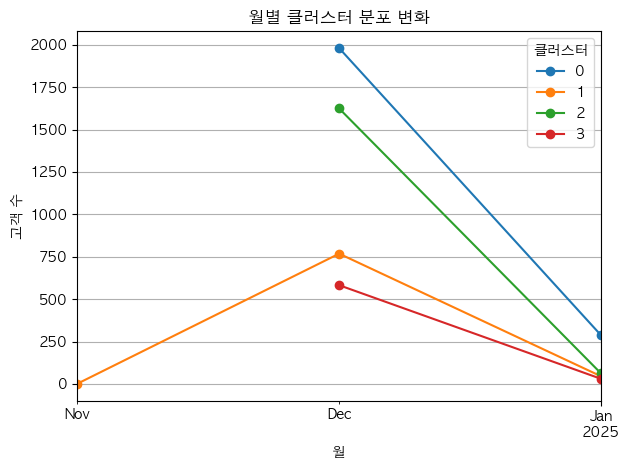

<Figure size 1500x600 with 0 Axes>

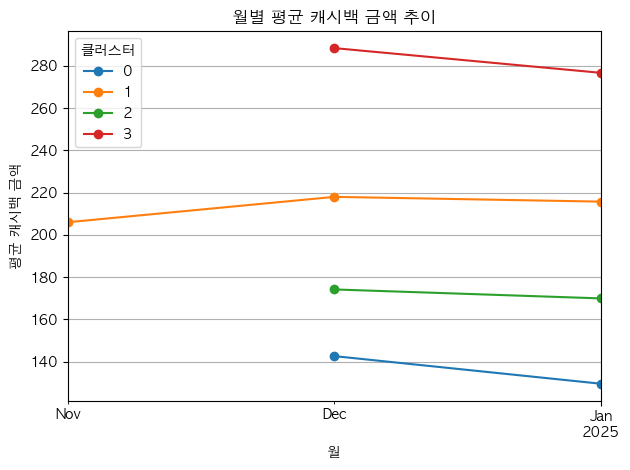

In [81]:
def analyze_cluster_trends(data, rfm_scaled):
    # 원본 데이터에 클러스터 정보 추가
    data = data.merge(rfm_scaled[['Cluster']], 
                     left_on='고객 ID', 
                     right_index=True, 
                     how='left')
    
    # 월별 데이터 준비
    data['구매일'] = pd.to_datetime(data['구매일'])
    data['월'] = data['구매일'].dt.to_period('M')
    
    # 월별 클러스터 분포 분석
    monthly_cluster_dist = data.groupby(['월', 'Cluster']).size().unstack()
    
    # 시각화
    plt.figure(figsize=(15, 6))
    monthly_cluster_dist.plot(kind='line', marker='o')
    plt.title('월별 클러스터 분포 변화')
    plt.xlabel('월')
    plt.ylabel('고객 수')
    plt.legend(title='클러스터')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # 월별 평균 구매금액 추이
    monthly_monetary = data.groupby(['월', 'Cluster'])['캐시백 금액'].mean().unstack()
    
    plt.figure(figsize=(15, 6))
    monthly_monetary.plot(kind='line', marker='o')
    plt.title('월별 평균 캐시백 금액 추이')
    plt.xlabel('월')
    plt.ylabel('평균 캐시백 금액')
    plt.legend(title='클러스터')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 분석 실행
analyze_cluster_trends(data, rfm_scaled)

이탈 예측 모델 성능:

분류 리포트:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       917
           1       0.80      0.77      0.79       159

    accuracy                           0.94      1076
   macro avg       0.88      0.87      0.87      1076
weighted avg       0.94      0.94      0.94      1076



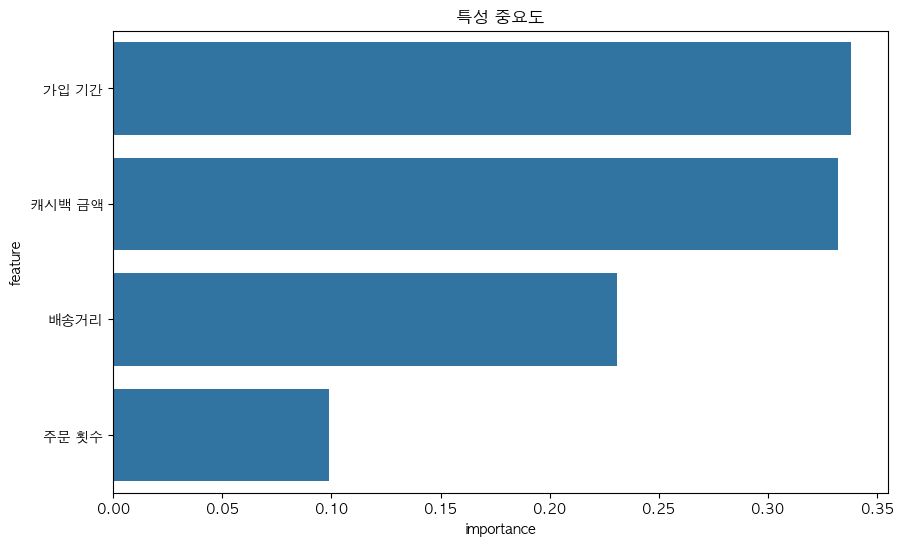

In [83]:
# 2. 예측 모델링 (고객 이탈 예측)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def predict_customer_churn(data):
    # 특성 선택
    features = ['가입 기간', '배송거리', '주문 횟수', '캐시백 금액']
    X = data[features]
    y = data['이탈 여부']
    
    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 모델 학습
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # 예측 및 평가
    y_pred = model.predict(X_test)
    
    # 결과 출력
    print("이탈 예측 모델 성능:")
    print("\n분류 리포트:")
    print(classification_report(y_test, y_pred))
    
    # 특성 중요도 시각화
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('특성 중요도')
    plt.show()
    
    return model

model = predict_customer_churn(data)

클러스터 3 고객의 기술 통계:
                R           F           M  Cluster
count  612.000000  612.000000  612.000000    612.0
mean     6.880719    5.261438  287.866013      3.0
std      4.505732    4.483863   20.432437      0.0
min      0.000000    1.000000  253.000000      3.0
25%      3.000000    2.000000  268.750000      3.0
50%      7.000000    3.000000  291.000000      3.0
75%     10.000000    7.000000  301.000000      3.0
max     18.000000   16.000000  325.000000      3.0
상관관계 행렬:
          R         F         M
R  1.000000  0.417211  0.093301
F  0.417211  1.000000  0.092527
M  0.093301  0.092527  1.000000


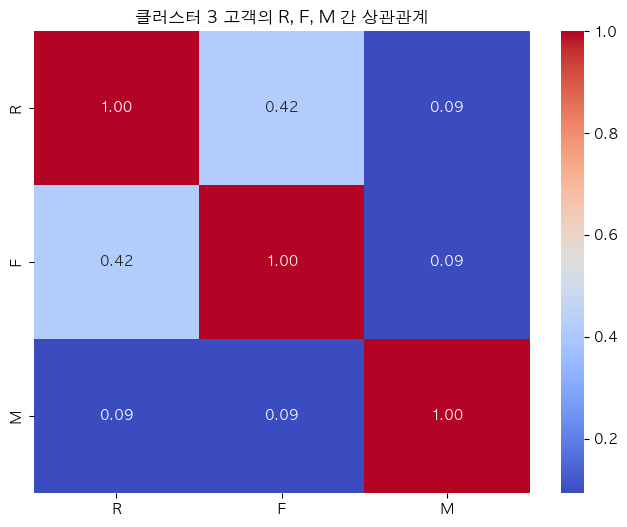

클러스터 3 고객의 R, F, M 변동성:
R     4.505732
F     4.483863
M    20.432437
dtype: float64


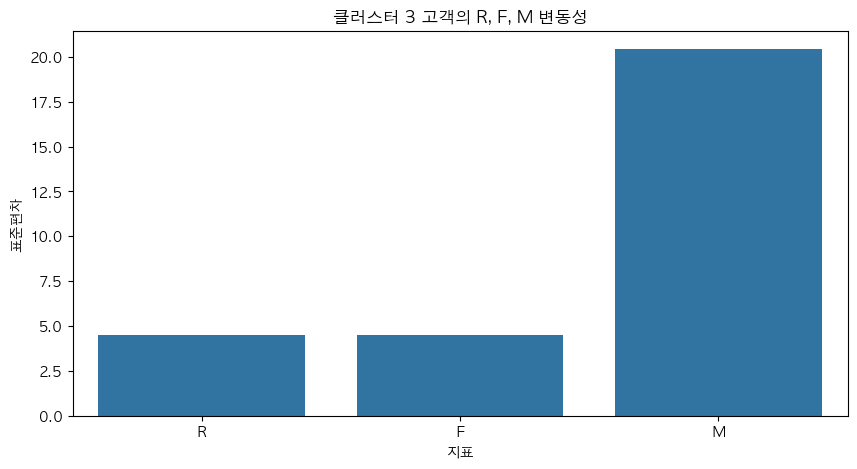

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 클러스터 3 고객 데이터 필터링
cluster_3_data = rfm[rfm['Cluster'] == 3]

# 기술 통계
print("클러스터 3 고객의 기술 통계:")
print(cluster_3_data.describe())

# 상관관계 분석
correlation_matrix = cluster_3_data[['R', 'F', 'M']].corr()
print("상관관계 행렬:")
print(correlation_matrix)

# 상관관계 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('클러스터 3 고객의 R, F, M 간 상관관계')
plt.show()

# 변동성 분석
cluster_3_variability = cluster_3_data[['R', 'F', 'M']].std()
print("클러스터 3 고객의 R, F, M 변동성:")
print(cluster_3_variability)

# 변동성 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=cluster_3_variability.index, y=cluster_3_variability.values)
plt.title('클러스터 3 고객의 R, F, M 변동성')
plt.ylabel('표준편차')
plt.xlabel('지표')
plt.show()

구매일 분포 분석:

전체 구매 건수: 5379

구매일 범위:
최초 구매일: 2024-11-16 00:00:00
최근 구매일: 2025-01-01 00:00:00


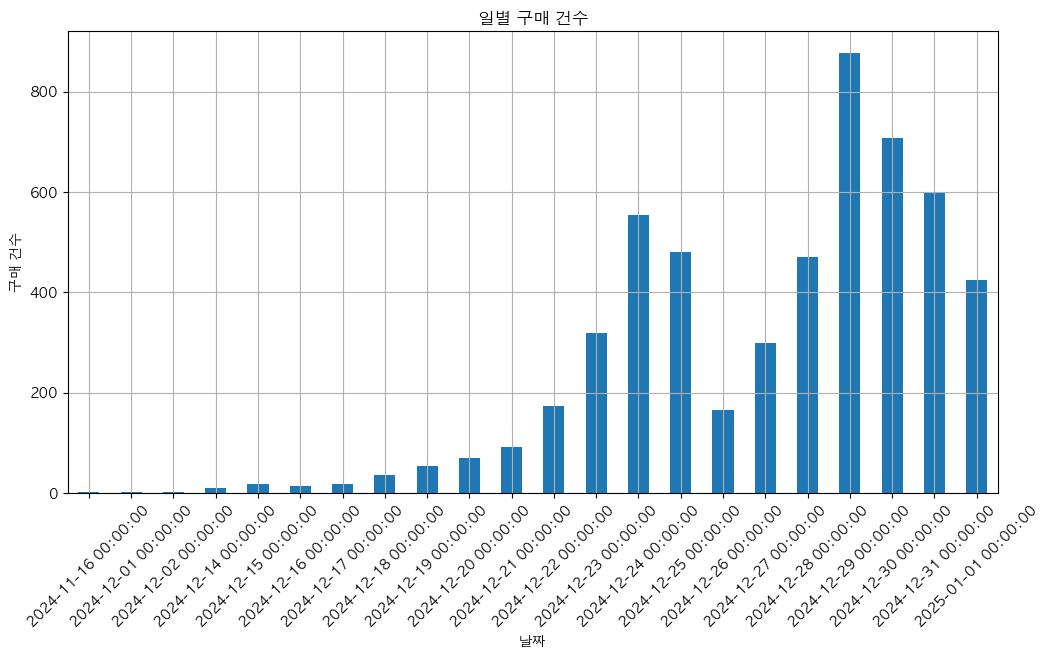

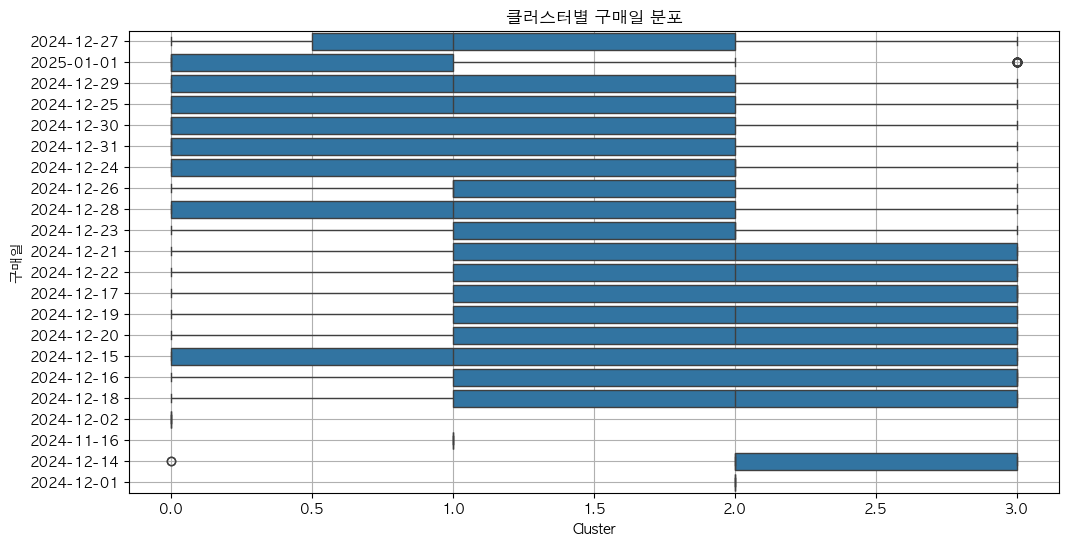

<Figure size 1200x600 with 0 Axes>

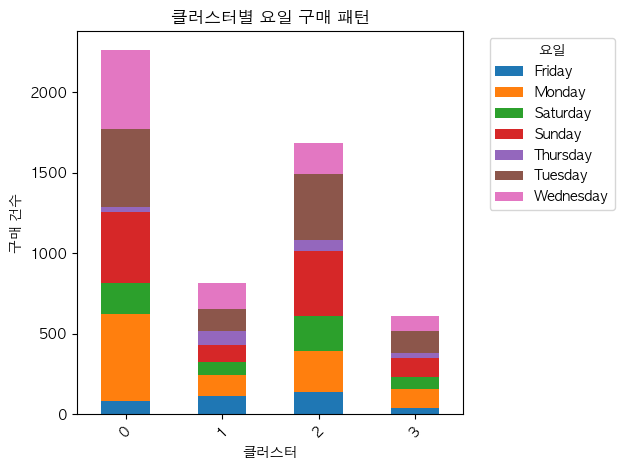


클러스터별 구매 통계:
        고객 ID  캐시백 금액        주문 횟수      
        count    mean    std  mean   std
Cluster                                 
0        2267  140.95  14.48  2.23  2.00
1         814  217.87  14.81  4.31  3.56
2        1686  174.03  10.42  2.98  2.39
3         612  287.87  20.43  5.26  4.48


In [94]:
def analyze_purchase_patterns(data, rfm_scaled):
    # 클러스터 정보 추가
    data = data.merge(rfm_scaled[['Cluster']], 
                     left_on='고객 ID', 
                     right_index=True, 
                     how='left')
    
    # 구매일 분포 분석
    print("구매일 분포 분석:")
    print("\n전체 구매 건수:", len(data))
    print("\n구매일 범위:")
    print(f"최초 구매일: {data['구매일'].min()}")
    print(f"최근 구매일: {data['구매일'].max()}")
    
    # 일별 구매 건수 분석
    daily_purchases = data.groupby('구매일').size()
    
    plt.figure(figsize=(12, 6))
    daily_purchases.plot(kind='bar')
    plt.title('일별 구매 건수')
    plt.xlabel('날짜')
    plt.ylabel('구매 건수')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    
    # 클러스터별 구매일 분포
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y='구매일', data=data)
    plt.title('클러스터별 구매일 분포')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.show()
    
    # 요일별 구매 패턴
    data['요일'] = data['구매일'].dt.day_name()
    daily_patterns = data.groupby(['Cluster', '요일']).size().unstack()
    
    plt.figure(figsize=(12, 6))
    daily_patterns.plot(kind='bar', stacked=True)
    plt.title('클러스터별 요일 구매 패턴')
    plt.xlabel('클러스터')
    plt.ylabel('구매 건수')
    plt.xticks(rotation=45)
    plt.legend(title='요일', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # 클러스터별 구매 통계
    cluster_stats = data.groupby('Cluster').agg({
        '고객 ID': 'count',
        '캐시백 금액': ['mean', 'std'],
        '주문 횟수': ['mean', 'std']
    }).round(2)
    
    print("\n클러스터별 구매 통계:")
    print(cluster_stats)
    
    return daily_patterns, daily_purchases, cluster_stats

# 분석 실행
daily_patterns, daily_purchases, cluster_stats = analyze_purchase_patterns(data, rfm_scaled)

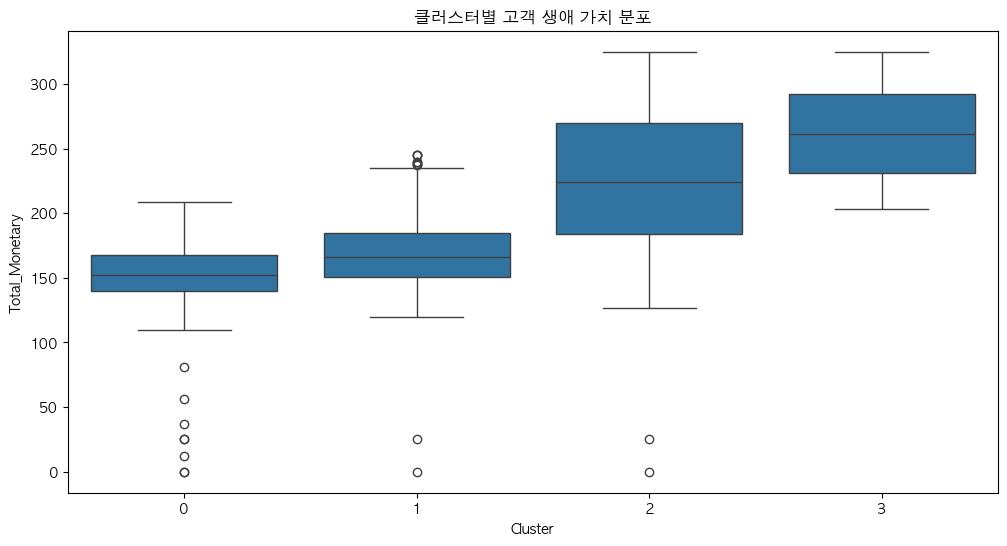

In [96]:
# 1. RFM 분석 및 클러스터링 수행
def perform_rfm_clustering(data):
    # RFM 계산
    rfm = data.groupby('고객 ID').agg({
        '구매일': lambda x: (pd.Timestamp.now() - x.max()).days,  # Recency
        '주문 횟수': 'sum',                                      # Frequency
        '캐시백 금액': 'sum'                                     # Monetary
    }).rename(columns={'구매일': 'R', '주문 횟수': 'F', '캐시백 금액': 'M'})
    
    # K-means 클러스터링
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm)
    kmeans = KMeans(n_clusters=4, random_state=42)
    rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
    
    return rfm

# 2. CLV 분석
def calculate_cluster_clv(data, rfm):
    # 클러스터 정보를 원본 데이터에 병합
    data_with_cluster = data.merge(
        rfm[['Cluster']], 
        left_on='고객 ID', 
        right_index=True
    )
    
    # CLV 계산
    clv_data = data_with_cluster.groupby('고객 ID').agg({
        '캐시백 금액': 'sum',
        '주문 횟수': 'count',
        'Cluster': 'last'
    }).rename(columns={'캐시백 금액': 'Total_Monetary'})
    
    # 클러스터별 평균 CLV
    cluster_clv = clv_data.groupby('Cluster').agg({
        'Total_Monetary': ['mean', 'std', 'count']
    })
    
    # 시각화
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y='Total_Monetary', data=clv_data)
    plt.title('클러스터별 고객 생애 가치 분포')
    plt.show()
    
    return cluster_clv

# 실행
rfm = perform_rfm_clustering(data)
cluster_clv = calculate_cluster_clv(data, rfm)

# 시사점:
1. 클러스터 번호가 증가할수록 고객 생애 가치가 증가하는 경향
2. 고가치 클러스터(2,3)일수록 분포 범위가 넓어 고객 간 편차가 큼
3. 저가치 클러스터(0,1)는 상대적으로 안정적인 소비 패턴을 보임
4. 마케팅 전략 수립 시 클러스터 3 고객의 유지와 클러스터 2 고객의 상향 이동에 집중할 필요가 있음

In [ ]:
# 5. 구매 패턴 분석
def analyze_purchase_patterns(data):
    # 구매 주기 분석
    purchase_intervals = data.groupby('고객 ID')['구매일'].agg(lambda x: x.diff().mean()).dropna()
    
    plt.figure(figsize=(12, 6))
    sns.histplot(purchase_intervals.dt.days, bins=30)
    plt.title('구매 주기 분포')
    plt.xlabel('구매 간격 (일)')
    plt.show()
    
    # 클러스터별 구매 패턴
    cluster_patterns = data.groupby('Cluster').agg({
        '주문 횟수': ['mean', 'std'],
        '캐시백 금액': ['mean', 'std'],
        '배송거리': ['mean', 'std']
    })
    
    # 요일별 구매 패턴
    data['요일'] = data['구매일'].dt.day_name()
    daily_patterns = data.groupby(['Cluster', '요일']).size().unstack()
    
    plt.figure(figsize=(12, 6))
    daily_patterns.plot(kind='bar', stacked=True)
    plt.title('클러스터별 요일 구매 패턴')
    plt.xticks(rotation=45)
    plt.show()
    
    return cluster_patterns, daily_patterns

cluster_patterns, daily_patterns = analyze_purchase_patterns(data)



클러스터별 특성:
        Recency       Frequency       Monetary        
           mean count      mean   sum     mean     sum
Cluster                                               
0          2.27  2858      1.80  5136   153.91  439874
1          8.27  1222      3.32  4053   168.65  206094
2          9.00   569     10.04  5713   227.37  129371
3          5.18   730      2.60  1898   261.82  191127


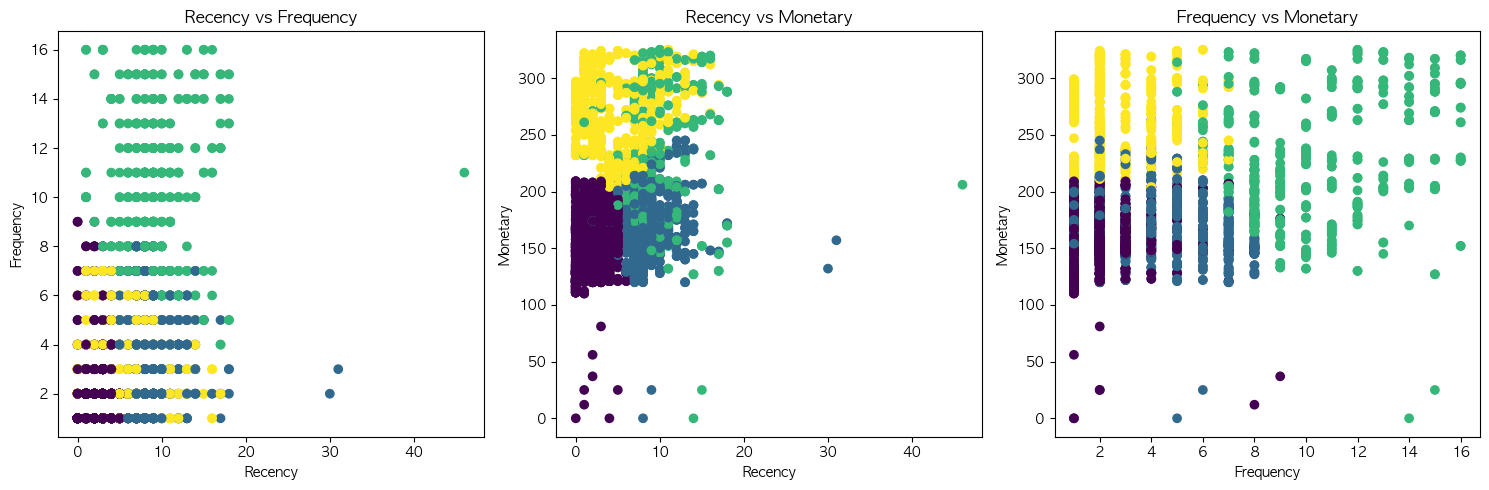

In [104]:
# 1. RFM 분석 및 클러스터링 수행
def perform_rfm_analysis(data):
    """
    RFM 분석 및 클러스터링을 수행하는 함수
    """
    # 데이터 전처리
    data['구매일'] = pd.to_datetime(data['구매일'])
    current_date = data['구매일'].max()  # 데이터의 최근 날짜 사용
    
    # RFM 계산
    rfm = data.groupby('고객 ID').agg({
        '구매일': lambda x: (current_date - x.max()).days,  # Recency
        '주문 횟수': 'sum',                                # Frequency
        '캐시백 금액': 'sum'                               # Monetary
    }).rename(columns={
        '구매일': 'Recency',
        '주문 횟수': 'Frequency',
        '캐시백 금액': 'Monetary'
    })
    
    # 데이터 스케일링
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm)
    rfm_scaled = pd.DataFrame(rfm_scaled, 
                            columns=['Recency', 'Frequency', 'Monetary'],
                            index=rfm.index)
    
    # K-means 클러스터링
    kmeans = KMeans(n_clusters=4, random_state=42)
    rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
    
    # 클러스터 특성 분석
    cluster_characteristics = rfm.groupby('Cluster').agg({
        'Recency': ['mean', 'count'],
        'Frequency': ['mean', 'sum'],
        'Monetary': ['mean', 'sum']
    }).round(2)
    
    print("\n클러스터별 특성:")
    print(cluster_characteristics)
    
    # 시각화
    plt.figure(figsize=(15, 5))
    
    # Recency vs Frequency
    plt.subplot(131)
    plt.scatter(rfm['Recency'], rfm['Frequency'], c=rfm['Cluster'], cmap='viridis')
    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    plt.title('Recency vs Frequency')
    
    # Recency vs Monetary
    plt.subplot(132)
    plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis')
    plt.xlabel('Recency')
    plt.ylabel('Monetary')
    plt.title('Recency vs Monetary')
    
    # Frequency vs Monetary
    plt.subplot(133)
    plt.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis')
    plt.xlabel('Frequency')
    plt.ylabel('Monetary')
    plt.title('Frequency vs Monetary')
    
    plt.tight_layout()
    plt.show()
    
    return rfm, cluster_characteristics

# 실행
rfm_results, cluster_chars = perform_rfm_analysis(data)

In [119]:
def analyze_purchase_patterns(data):
    """
    고객 구매 패턴을 분석하는 함수
    """
    # 데이터 전처리
    data = data.copy()
    data['구매일'] = pd.to_datetime(data['구매일'])
    
    # 디버깅을 위한 출력
    print("전체 데이터 샘플:")
    print(data[['고객 ID', '구매일', 'cluster']].head(10))
    print("\n전체 고객 수:", len(data['고객 ID'].unique()))
    
    # 고객별 구매 횟수 확인
    purchase_counts = data.groupby('고객 ID').size()
    print("\n구매 횟수 통계:")
    print(purchase_counts.describe())
    
    # 고객별 구매 간격 계산
    customer_intervals = []
    
    for customer_id in data['고객 ID'].unique():
        customer_data = data[data['고객 ID'] == customer_id]
        
        # 디버깅을 위한 출력
        if len(customer_intervals) < 5:  # 처음 5개 고객만 출력
            print(f"\n고객 {customer_id}의 구매 기록:")
            print(customer_data[['구매일', 'cluster']].sort_values('구매일'))
        
        dates = pd.to_datetime(customer_data['구매일']).sort_values().unique()  # unique 추가
        
        if len(dates) >= 2:
            intervals = []
            for i in range(1, len(dates)):
                interval = (dates[i] - dates[i-1]).days
                intervals.append(interval)
            
            avg_interval = sum(intervals) / len(intervals)
            cluster = customer_data['cluster'].iloc[0]
            
            customer_intervals.append({
                '고객_ID': customer_id,
                'cluster': cluster,
                '평균구매간격': avg_interval
            })
    
    intervals_df = pd.DataFrame(customer_intervals)
    
    print("\n생성된 구매 주기 데이터 정보:")
    print(intervals_df.info())
    print("\n구매 주기 데이터 처음 5행:")
    print(intervals_df.head())
    
    if not intervals_df.empty:
        print("\n클러스터별 평균 구매 주기:")
        cluster_stats = intervals_df.groupby('cluster')['평균구매간격'].agg(['mean', 'std', 'count']).round(2)
        print(cluster_stats)
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='cluster', y='평균구매간격', data=intervals_df)
        plt.title('클러스터별 구매 주기 분포', fontsize=12)
        plt.xlabel('클러스터', fontsize=10)
        plt.ylabel('평균 구매 간격 (일)', fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("\n경고: 구매 주기 데이터가 비어있습니다.")
        cluster_stats = None
    
    return intervals_df, cluster_stats

# 분석 실행
intervals_df, cluster_stats = analyze_purchase_patterns(data)

전체 데이터 샘플:


KeyError: "['cluster'] not in index"